In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/personal-key-indicators-of-heart-disease/2020/heart_2020_cleaned.csv
/kaggle/input/personal-key-indicators-of-heart-disease/2022/heart_2022_with_nans.csv
/kaggle/input/personal-key-indicators-of-heart-disease/2022/heart_2022_no_nans.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.neighbors import KNeighborsClassifier

Read Data

In [3]:
df=pd.read_csv('/kaggle/input/personal-key-indicators-of-heart-disease/2020/heart_2020_cleaned.csv')
df.head()


,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [4]:
df.tail()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No
319794,No,46.56,No,No,No,0.0,0.0,No,Female,80 or older,Hispanic,No,Yes,Good,8.0,No,No,No


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [6]:
df.isnull().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64


EDA

In [7]:
df.duplicated().sum()

18078

In [8]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [9]:

df.shape

(301717, 18)

In [10]:
categorical_columns=[col for col in df.columns if df[col].dtype=='object']
categorical_columns

['HeartDisease',
 'Smoking',
 'AlcoholDrinking',
 'Stroke',
 'DiffWalking',
 'Sex',
 'AgeCategory',
 'Race',
 'Diabetic',
 'PhysicalActivity',
 'GenHealth',
 'Asthma',
 'KidneyDisease',
 'SkinCancer']

In [11]:
for col in categorical_columns:
  print(col,df[col].unique())

HeartDisease ['No' 'Yes']
Smoking ['Yes' 'No']
AlcoholDrinking ['No' 'Yes']
Stroke ['No' 'Yes']
DiffWalking ['No' 'Yes']
Sex ['Female' 'Male']
AgeCategory ['55-59' '80 or older' '65-69' '75-79' '40-44' '70-74' '60-64' '50-54'
 '45-49' '18-24' '35-39' '30-34' '25-29']
Race ['White' 'Black' 'Asian' 'American Indian/Alaskan Native' 'Other'
 'Hispanic']
Diabetic ['Yes' 'No' 'No, borderline diabetes' 'Yes (during pregnancy)']
PhysicalActivity ['Yes' 'No']
GenHealth ['Very good' 'Fair' 'Good' 'Poor' 'Excellent']
Asthma ['Yes' 'No']
KidneyDisease ['No' 'Yes']
SkinCancer ['Yes' 'No']


In [12]:
df['Race'].value_counts()

Race
White                             227724
Hispanic                           27107
Black                              22810
Other                              10891
Asian                               7993
American Indian/Alaskan Native      5192
Name: count, dtype: int64

In [13]:
age_mapping = {
    '18-24': (18, 24),
    '25-29': (25, 29),
    '30-34': (30, 34),
    '35-39': (35, 39),
    '40-44': (40, 44),
    '45-49': (45, 49),
    '50-54': (50, 54),
    '55-59': (55, 59),
    '60-64': (60, 64),
    '65-69': (65, 69),
    '70-74': (70, 74),
    '75-79': (75, 79),
    '80 or older': (80, 100)
}
df['AgeCategory']=df['AgeCategory'].map(lambda x: (age_mapping[x][0] + age_mapping[x][1]) / 2)

In [14]:
df['AgeCategory']

0         57.0
1         90.0
2         67.0
3         77.0
4         42.0
          ... 
319790    62.0
319791    37.0
319792    47.0
319793    27.0
319794    90.0
Name: AgeCategory, Length: 301717, dtype: float64

In [15]:
col=['GenHealth','Race','Diabetic']
df = pd.get_dummies(df, columns=col)
df


,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,...,Race_American Indian/Alaskan Native,Race_Asian,Race_Black,Race_Hispanic,Race_Other,Race_White,Diabetic_No,"Diabetic_No, borderline diabetes",Diabetic_Yes,Diabetic_Yes (during pregnancy)
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,57.0,...,False,False,False,False,False,True,False,False,True,False
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,90.0,...,False,False,False,False,False,True,True,False,False,False
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,67.0,...,False,False,False,False,False,True,False,False,True,False
3,No,24.21,No,No,No,0.0,0.0,No,Female,77.0,...,False,False,False,False,False,True,True,False,False,False
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,42.0,...,False,False,False,False,False,True,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,62.0,...,False,False,False,True,False,False,False,False,True,False
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,37.0,...,False,False,False,True,False,False,True,False,False,False
319792,No,24.24,No,No,No,0.0,0.0,No,Female,47.0,...,False,False,False,True,False,False,True,False,False,False
319793,No,32.81,No,No,No,0.0,0.0,No,Female,27.0,...,False,False,False,True,False,False,True,False,False,False


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 301717 entries, 0 to 319794
Data columns (total 30 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   HeartDisease                         301717 non-null  object 
 1   BMI                                  301717 non-null  float64
 2   Smoking                              301717 non-null  object 
 3   AlcoholDrinking                      301717 non-null  object 
 4   Stroke                               301717 non-null  object 
 5   PhysicalHealth                       301717 non-null  float64
 6   MentalHealth                         301717 non-null  float64
 7   DiffWalking                          301717 non-null  object 
 8   Sex                                  301717 non-null  object 
 9   AgeCategory                          301717 non-null  float64
 10  PhysicalActivity                     301717 non-null  object 
 11  SleepTime         

In [17]:
df.describe()

,BMI,PhysicalHealth,MentalHealth,AgeCategory,SleepTime
count,301717.000000,301717.000000,301717.000000,301717.000000,301717.000000
mean,28.441970,3.572298,4.121475,55.099935,7.084559
std,6.468134,8.140656,8.128288,19.085149,1.467122
min,12.020000,0.000000,0.000000,21.000000,1.000000
25%,24.030000,0.000000,0.000000,42.000000,6.000000
50%,27.410000,0.000000,0.000000,57.000000,7.000000
75%,31.650000,2.000000,4.000000,67.000000,8.000000
max,94.850000,30.000000,30.000000,90.000000,24.000000


In [18]:
categorical_columns=[col for col in df.columns if df[col].dtype!=['float64','int64']]
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

In [19]:
for col in categorical_columns:
  le=LabelEncoder()
  df[col]=le.fit_transform(df[col])

df.dtypes

HeartDisease                           int64
BMI                                    int64
Smoking                                int64
AlcoholDrinking                        int64
Stroke                                 int64
PhysicalHealth                         int64
MentalHealth                           int64
DiffWalking                            int64
Sex                                    int64
AgeCategory                            int64
PhysicalActivity                       int64
SleepTime                              int64
Asthma                                 int64
KidneyDisease                          int64
SkinCancer                             int64
GenHealth_Excellent                    int64
GenHealth_Fair                         int64
GenHealth_Good                         int64
GenHealth_Poor                         int64
GenHealth_Very good                    int64
Race_American Indian/Alaskan Native    int64
Race_Asian                             int64
Race_Black

<Axes: >

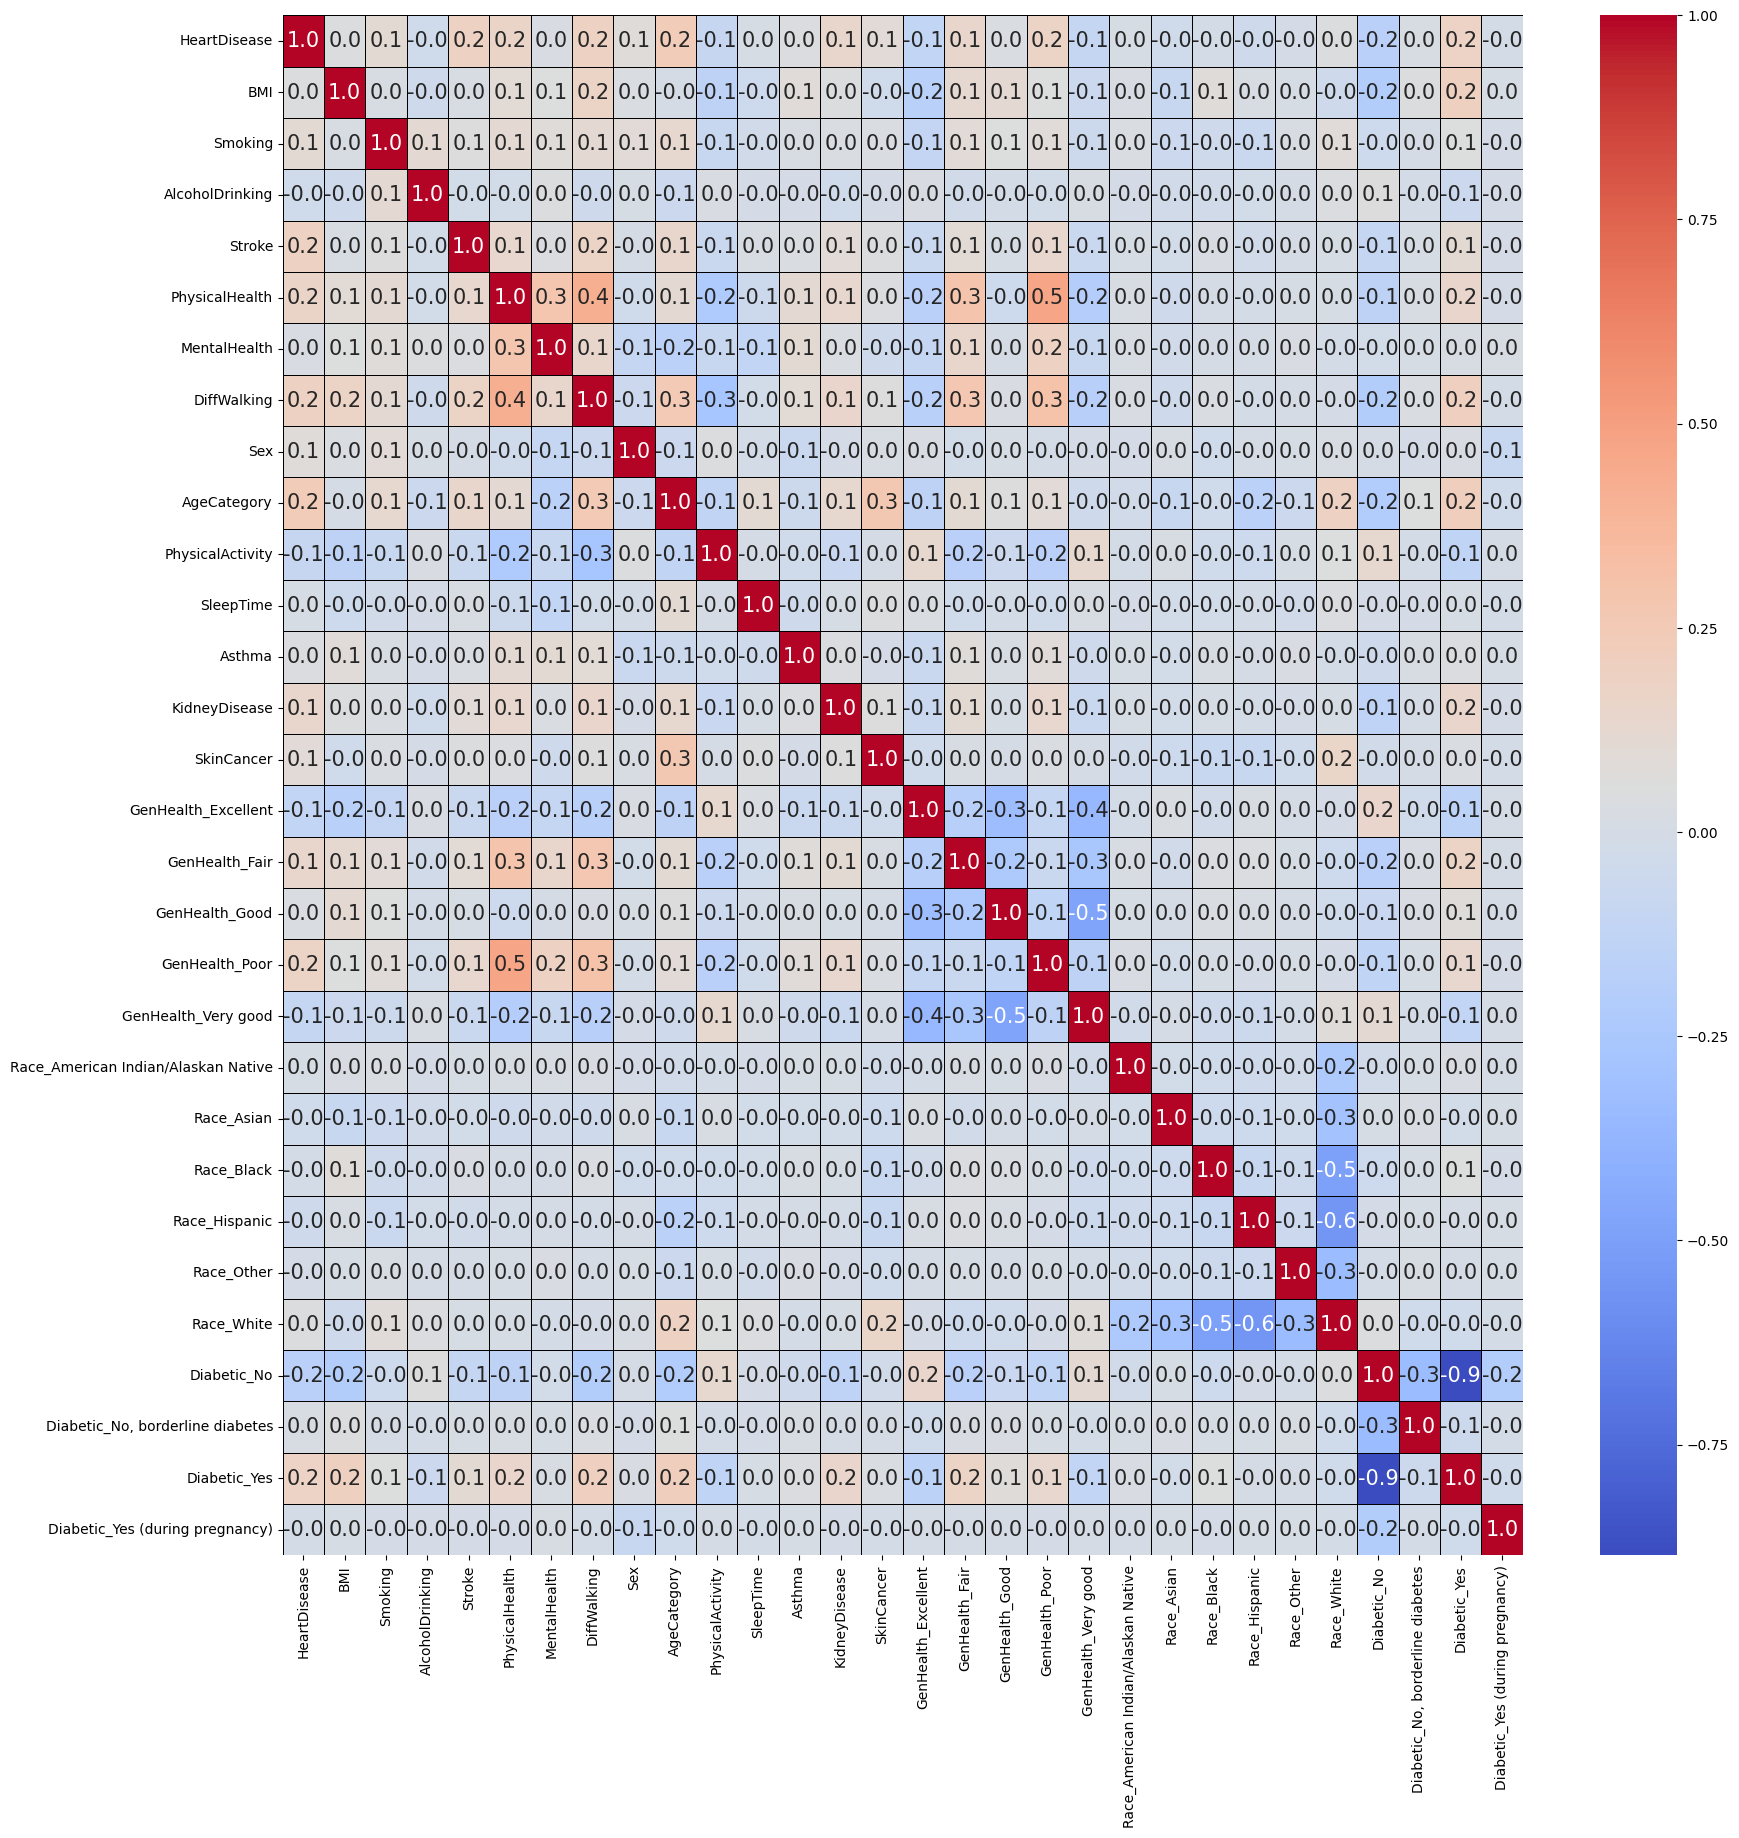

In [20]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True,fmt='.1f',cmap='coolwarm',          
                      linewidths=0.7,           
                      linecolor='black',    
                      annot_kws={"size": 15})   

In [21]:
df.drop(['Diabetic_Yes','Race_Other','GenHealth_Good'],axis=1,inplace=True)

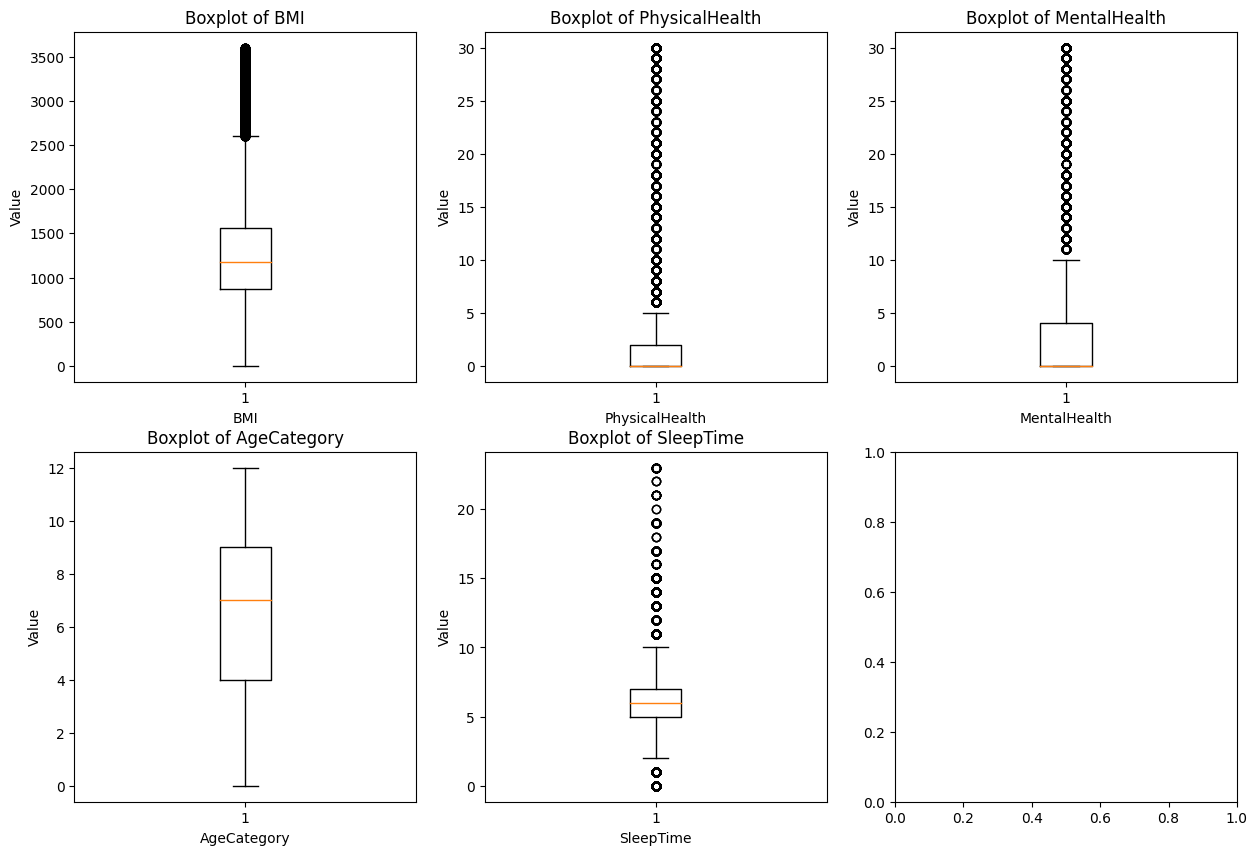

In [22]:
num_cols = len(numerical_columns)
num_rows = (num_cols // 3) + (num_cols % 3 > 0)
fig, axes = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5 * num_rows))
axes = axes.flatten()

for ax, col in zip(axes, numerical_columns):
    ax.boxplot(df[col])
    ax.set_title(f'Boxplot of {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Value')


In [23]:
for col in numerical_columns:
  if col=='PhysicalHealth' or col=='MentalHealth':
    continue

  Q1=np.percentile(df[col],25)
  Q3=np.percentile(df[col],75)
  IQR=Q3-Q1
  lower_bound=Q1-(1.5*IQR)
  upper_bound=Q3+1.5*IQR
  df=df[df[col]<=upper_bound]
  df=df[df[col]>=lower_bound]


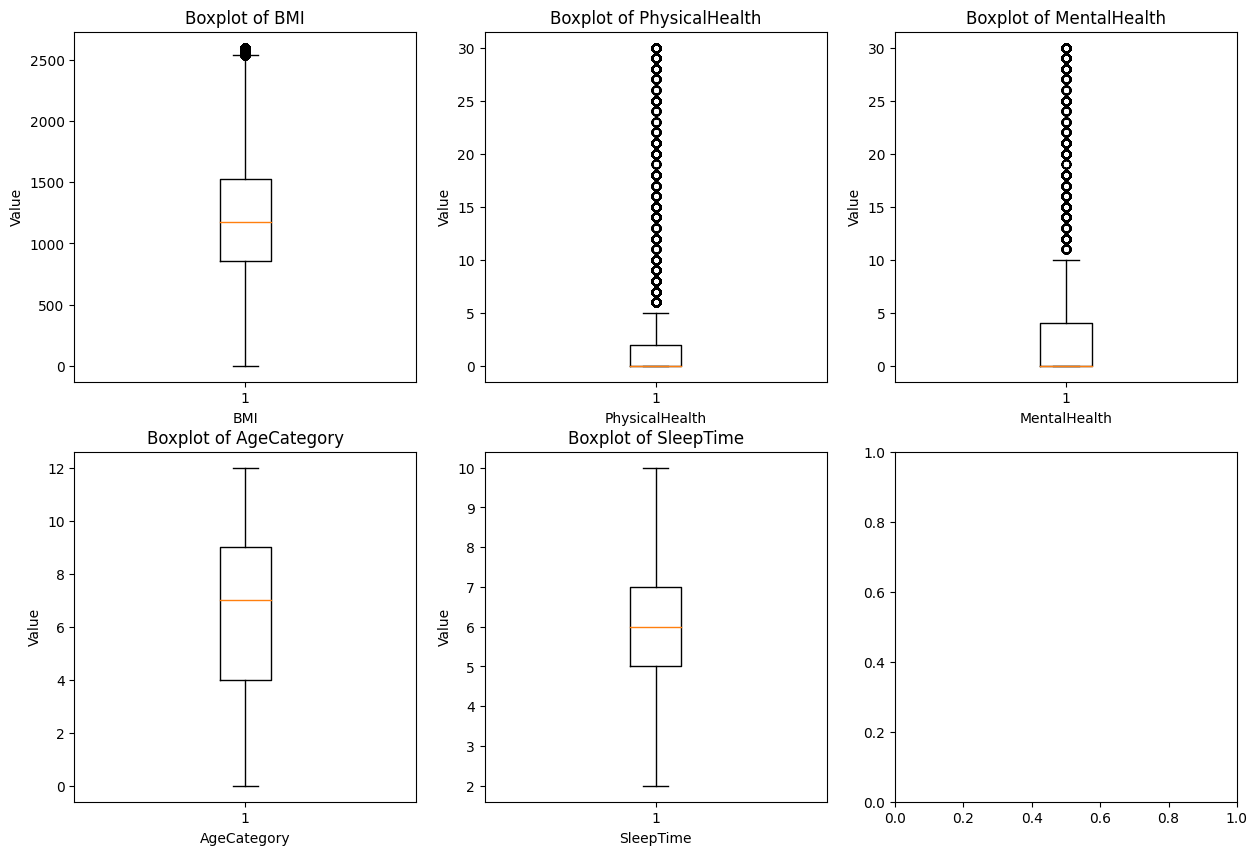

In [24]:
num_cols = len(numerical_columns)
num_rows = (num_cols // 3) + (num_cols % 3 > 0)

fig, axes = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5 * num_rows))
axes = axes.flatten()
for ax, col in zip(axes, numerical_columns):
    ax.boxplot(df[col])
    ax.set_title(f'Boxplot of {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Value')


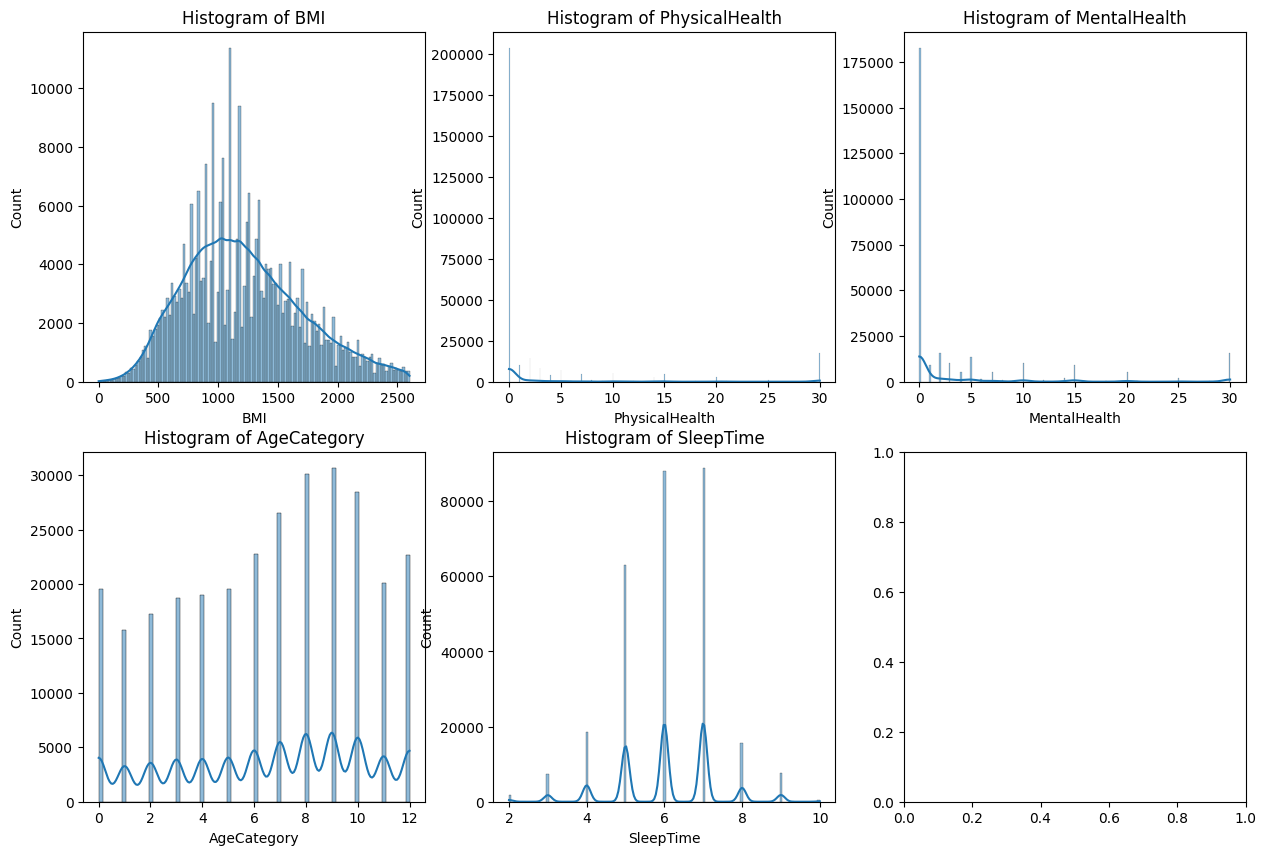

In [25]:
num_cols = len(numerical_columns)
num_rows = (num_cols // 3) + (num_cols % 3 > 0)
fig, axes = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5 * num_rows))
axes = axes.flatten()
for ax, col in zip(axes, numerical_columns):
    sns.histplot(df[col], ax=ax, kde=True)
    ax.set_title(f'Histogram of {col}')
    ax.set_xlabel(col)

In [26]:
df['AgeCategory']=np.square(df['AgeCategory']+1)
df['SleepTime']=np.square(df['SleepTime']+1)
df['MentalHealth']=np.log(df['MentalHealth']+1)

<Axes: xlabel='AgeCategory', ylabel='Count'>

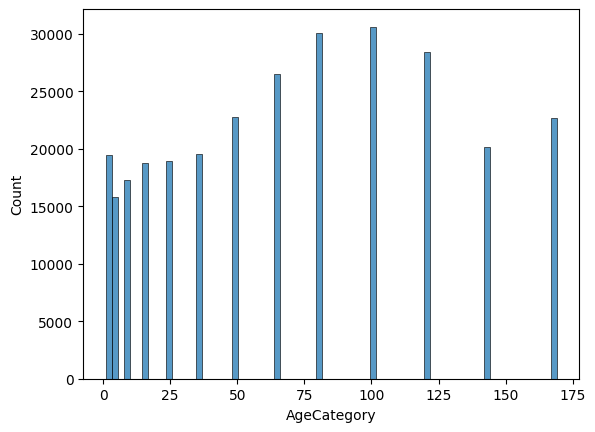

In [27]:
sns.histplot(x=df['AgeCategory'])

<Axes: xlabel='SleepTime', ylabel='Count'>

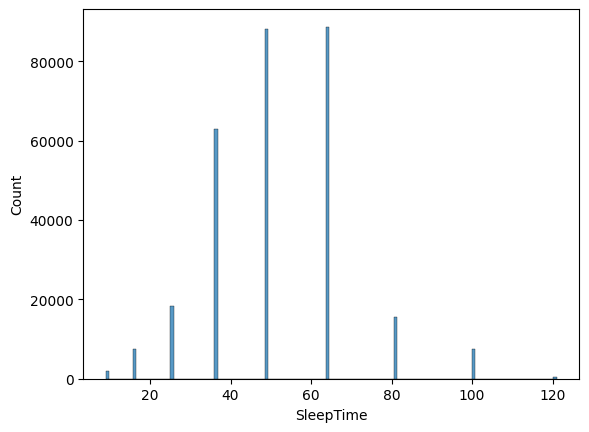

In [28]:
sns.histplot(x=df['SleepTime'])

<Axes: xlabel='MentalHealth', ylabel='Count'>

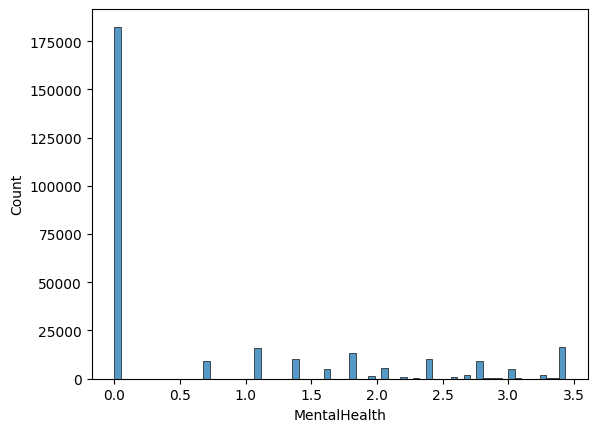

In [29]:
sns.histplot(x=df['MentalHealth'])

In [30]:
df.drop(['PhysicalHealth','MentalHealth'],axis=1,inplace=True)

<Axes: xlabel='HeartDisease', ylabel='count'>

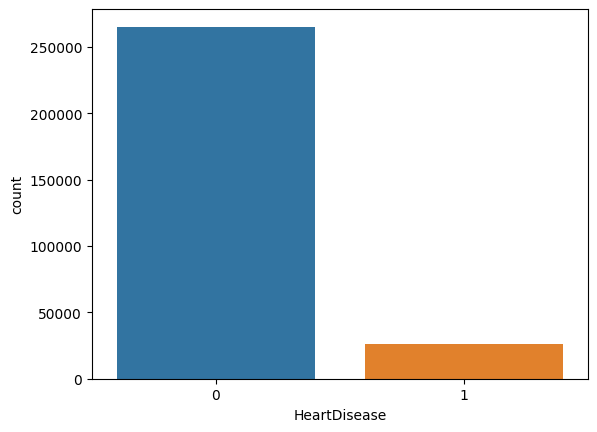

In [31]:
sns.countplot(x=df['HeartDisease'],data=df)

In [32]:
x=df.drop('HeartDisease',axis=1)
y=df['HeartDisease']

In [33]:
from imblearn.over_sampling import SMOTE

resampler = SMOTE()
x,y = resampler.fit_resample(x,y)

<Axes: xlabel='HeartDisease', ylabel='count'>

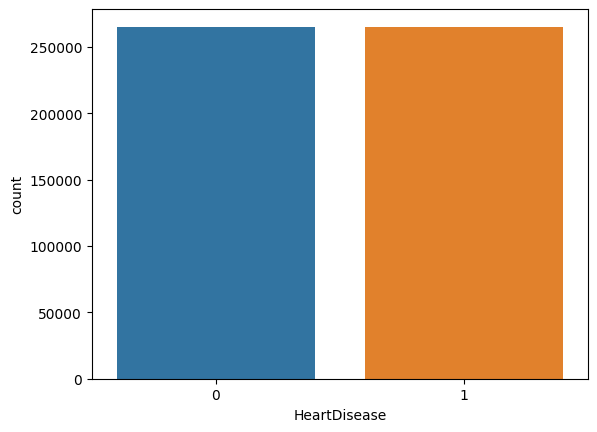

In [34]:
sns.countplot(df,x=y)

In [35]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [36]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
mn=MinMaxScaler()
x_train=mn.fit_transform(x_train)
x_test=mn.transform(x_test)

Model 1:logistic Regression

In [37]:
model1=LogisticRegression()
model1.fit(x_train,y_train)
y_pred=model1.predict(x_test)

score1=model1.score(x_test,y_test)
score1

0.8507718696397941

In [38]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[44112,  8752],
       [ 7082, 46160]])

<Axes: >

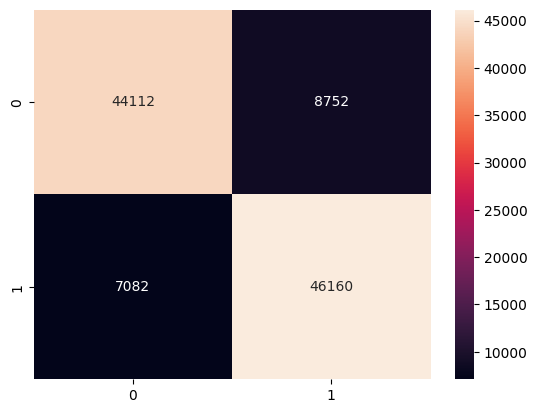

In [39]:
sns.heatmap(cm,annot=True,fmt='d')

In [40]:
cr=classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.86      0.83      0.85     52864
           1       0.84      0.87      0.85     53242

    accuracy                           0.85    106106
   macro avg       0.85      0.85      0.85    106106
weighted avg       0.85      0.85      0.85    106106



Model 2:Decision Tree

In [41]:
model2=DecisionTreeClassifier()

param={
    'max_depth':[None,2,5,10],
    'min_samples_split':[2,4,10]}

search1=GridSearchCV(model2,param)
search1.fit(x_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [None, 2, 5, 10],
                         'min_samples_split': [2, 4, 10]})

In [42]:
search1.best_params_

{'max_depth': None, 'min_samples_split': 2}

In [43]:
search1.best_score_

0.8844593310002373

In [44]:
model2=DecisionTreeClassifier(min_samples_split= search1.best_params_['min_samples_split'])
model2.fit(x_train,y_train)
y_pred=model2.predict(x_test)

score2=model2.score(x_test,y_test)
score2

0.8907413341375605

In [45]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[45767,  7097],
       [ 4496, 48746]])

In [46]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[45767,  7097],
       [ 4496, 48746]])

In [47]:
cr=classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.91      0.87      0.89     52864
           1       0.87      0.92      0.89     53242

    accuracy                           0.89    106106
   macro avg       0.89      0.89      0.89    106106
weighted avg       0.89      0.89      0.89    106106



Model 3:Random Forest

In [48]:
model3=RandomForestClassifier()

param={
     'n_estimators': [10, 50, 100],
    'max_depth': [10, 20, 5]
}

search2=GridSearchCV(model3,param,cv=5,verbose=1,
    n_jobs=-1 )

search2.fit(x_train,y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [10, 20, 5],
                         'n_estimators': [10, 50, 100]},
             verbose=1)

In [49]:
search2.best_params_

{'max_depth': 20, 'n_estimators': 100}

In [50]:
search2.best_score_

0.8754447249191915

In [51]:
model3=RandomForestClassifier(max_depth=20,n_estimators=100 ,random_state=0)

model3.fit(x_train, y_train)

y_pred = model3.predict(x_test)

score3=model3.score(x_test,y_test)
score3


0.8763971877179424

In [52]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[45132,  7732],
       [ 5383, 47859]])

<Axes: >

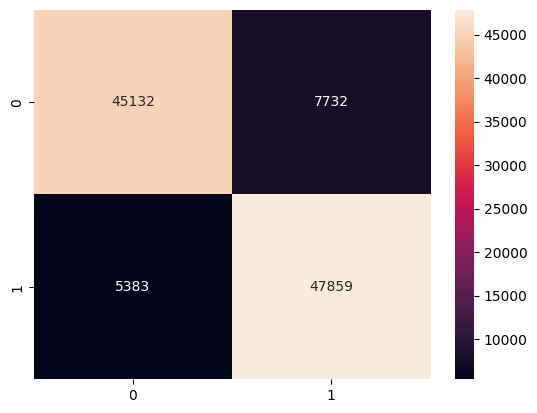

In [53]:
sns.heatmap(cm,annot=True,fmt='d')

In [54]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.89      0.85      0.87     52864
           1       0.86      0.90      0.88     53242

    accuracy                           0.88    106106
   macro avg       0.88      0.88      0.88    106106
weighted avg       0.88      0.88      0.88    106106



Model 5:Gradient Boosting

In [55]:
model5=GradientBoostingClassifier()
model5.fit(x_train, y_train)
y_pred = model5.predict(x_test)
score5 = accuracy_score(y_test, y_pred)
score5

0.851544681733361

In [56]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[43753,  9111],
       [ 6641, 46601]])

<Axes: >

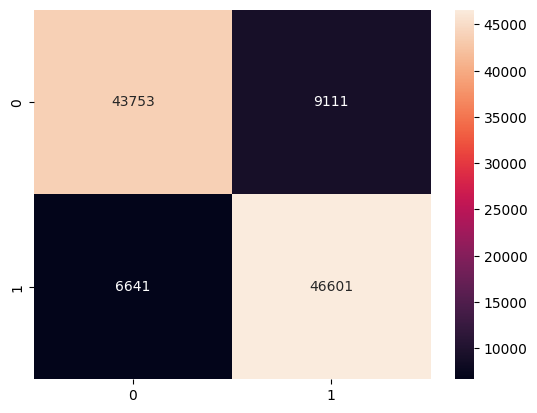

In [57]:
sns.heatmap(cm,annot=True,fmt='d')

In [58]:
cr=classification_report(y_test,y_pred)
print(cr)


              precision    recall  f1-score   support

           0       0.87      0.83      0.85     52864
           1       0.84      0.88      0.86     53242

    accuracy                           0.85    106106
   macro avg       0.85      0.85      0.85    106106
weighted avg       0.85      0.85      0.85    106106




Model 6:XGBoost

In [59]:
model6 = xgb.XGBClassifier()
model6.fit(x_train, y_train)
y_pred = model6.predict(x_test)
score6 = accuracy_score(y_test, y_pred)
score6

0.8740316287486098

In [60]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[45489,  7375],
       [ 5991, 47251]])

<Axes: >

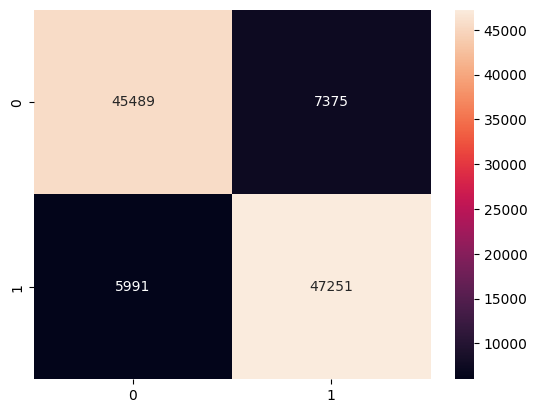

In [61]:
sns.heatmap(cm,annot=True,fmt='d')

In [62]:
class_report = classification_report(y_test, y_pred)
print(class_report)


              precision    recall  f1-score   support

           0       0.88      0.86      0.87     52864
           1       0.86      0.89      0.88     53242

    accuracy                           0.87    106106
   macro avg       0.87      0.87      0.87    106106
weighted avg       0.87      0.87      0.87    106106



Model 7:Naive Bayes

In [63]:
model7 = MultinomialNB()
model7.fit(x_train, y_train)
y_pred = model7.predict(x_test)
score7 = accuracy_score(y_test, y_pred)
score7

0.8090400165871864

In [64]:
cm=confusion_matrix(y_test,y_pred)
cm


array([[39564, 13300],
       [ 6962, 46280]])

<Axes: >

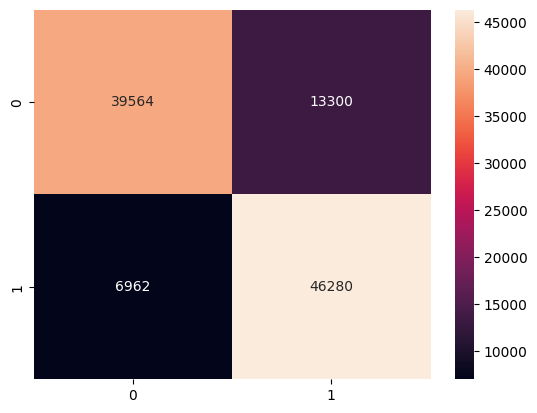

In [65]:
sns.heatmap(cm,annot=True,fmt='d')

In [66]:
cr=classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.85      0.75      0.80     52864
           1       0.78      0.87      0.82     53242

    accuracy                           0.81    106106
   macro avg       0.81      0.81      0.81    106106
weighted avg       0.81      0.81      0.81    106106



Model 8:Gaussian Naive Bayes

In [67]:
model8=GaussianNB()
model8.fit(x_train,y_train)
y_pred=model8.predict(x_test)
score8=accuracy_score(y_test,y_pred)
score8

0.7197896443179462

In [68]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[25393, 27471],
       [ 2261, 50981]])

<Axes: >

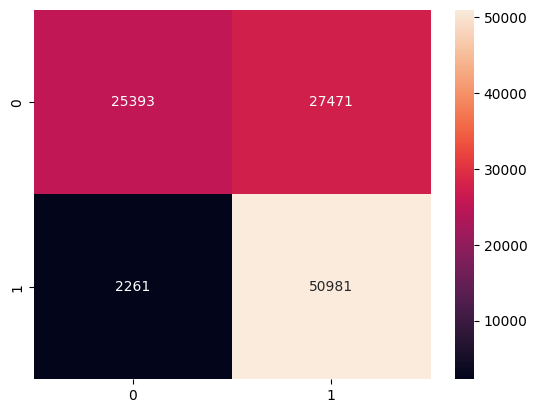

In [69]:
sns.heatmap(cm,annot=True,fmt='d')

In [70]:
class_report = classification_report(y_test, y_pred)
print(class_report)

              precision    recall  f1-score   support

           0       0.92      0.48      0.63     52864
           1       0.65      0.96      0.77     53242

    accuracy                           0.72    106106
   macro avg       0.78      0.72      0.70    106106
weighted avg       0.78      0.72      0.70    106106



Model 9:K-Nearst Neighbors(knn)

In [71]:
scores=[]
for i in range(1,6):
  model9=KNeighborsClassifier(n_neighbors=i)
  model9.fit(x_train,y_train)
  scores.append(model9.score(x_test,y_test))


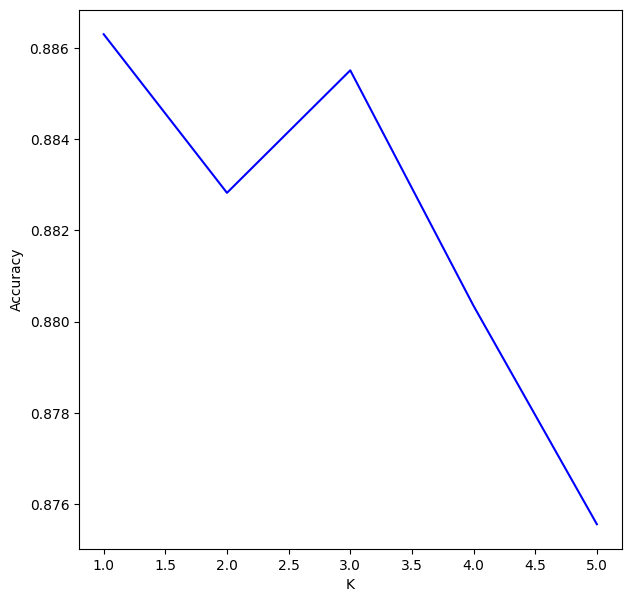

In [72]:
plt.figure(figsize=(7,7))
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.plot(range(1,6),scores,color='blue')


In [73]:
model9= KNeighborsClassifier(n_neighbors=3)

model9.fit(x_train,y_train)
y_pred=model9.predict(x_test)

score9=model9.score(x_test,y_test)
score9

0.885510715699395

In [74]:
cm=confusion_matrix(y_test,y_pred)
cm


array([[45271,  7593],
       [ 4555, 48687]])

<Axes: >

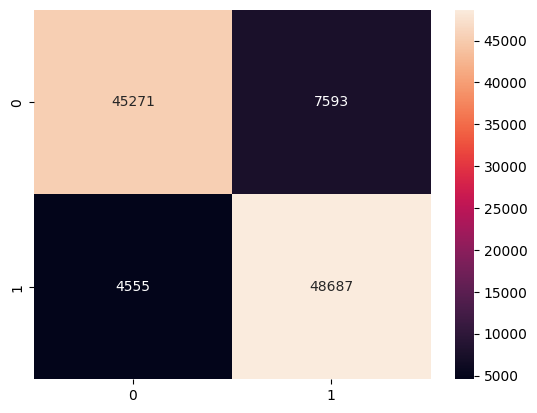

In [75]:
sns.heatmap(cm,annot=True,fmt='d')

In [76]:
class_report = classification_report(y_test, y_pred)
print(class_report)


              precision    recall  f1-score   support

           0       0.91      0.86      0.88     52864
           1       0.87      0.91      0.89     53242

    accuracy                           0.89    106106
   macro avg       0.89      0.89      0.89    106106
weighted avg       0.89      0.89      0.89    106106



compare the score of models

In [77]:
scores = {
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest', 'Gradient Boosting', 'XGBoost', 'Naive Bayes', 'Gaussian Naive Bayes', 'K-Nearest Neighbors'],
    'Score': [score1, score2, score3, score5, score6, score7, score8, score9]
}

# Create DataFrame
scores_df = pd.DataFrame(scores)



(0.0, 1.0)

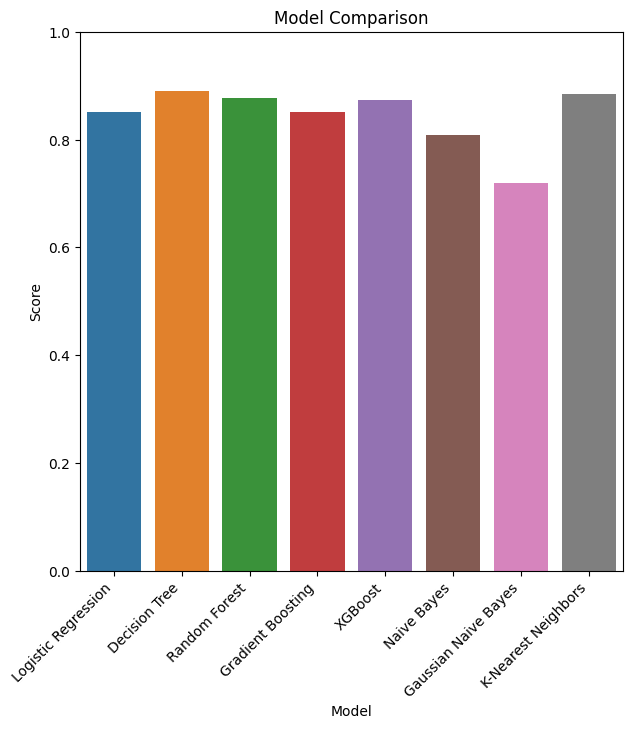

In [78]:
plt.figure(figsize=(7,7))
sns.barplot(x='Model', y='Score', data=scores_df)

# Customize the plot
plt.title('Model Comparison')
plt.xlabel('Model')
plt.ylabel('Score')
plt.xticks(rotation=45, ha='right') 
plt.ylim(0, 1,0.1)